In [2]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#from pandas.io.data import DataReader
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
#from pandas.io.data import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [3]:
words = pd.read_csv('data/50words_TEST.csv')

In [4]:
test = words.ix[:, 1:].as_matrix()

In [9]:
a = lambda x, y: x[0] + y[0]
p = pairwise_distances(test, metric = 'euclidean')

In [11]:
p.shape
Z = linkage(p, 'single')

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [12]:
Z

array([[  43.        ,  140.        ,    9.68645189,    2.        ],
       [  92.        ,  297.        ,    9.78666512,    2.        ],
       [ 204.        ,  345.        ,   11.24263913,    2.        ],
       ..., 
       [ 883.        ,  903.        ,   56.88865769,  451.        ],
       [ 895.        ,  904.        ,   58.17100674,  453.        ],
       [ 332.        ,  905.        ,   59.83024622,  454.        ]])

In [13]:
words.head()

,4,-0.89094,-0.86099,-0.82438,-0.78214,-0.73573,-0.68691,-0.63754,-0.58937,-0.54342,...,-0.86309,-0.86791,-0.87271,-0.87846,-0.88592,-0.89619,-0.90783,-0.91942,-0.93018,-0.93939
0,12,-0.78346,-0.68562,-0.58409,-0.47946,-0.37398,-0.27008,-0.17225,-0.087463,-0.019191,...,-0.88318,-0.89189,-0.90290,-0.91427,-0.92668,-0.93966,-0.95244,-0.96623,-0.9805,-0.99178
1,13,-1.32560,-1.28430,-1.21970,-1.15670,-1.09980,-1.04960,-1.01550,-0.996720,-0.985040,...,-0.83499,-0.86204,-0.88559,-0.90454,-0.93353,-0.99135,-1.06910,-1.13680,-1.1980,-1.27000
2,23,-1.09370,-1.04200,-0.99840,-0.95997,-0.93997,-0.93764,-0.92649,-0.857090,-0.693320,...,-0.72810,-0.74512,-0.76376,-0.78068,-0.80593,-0.84350,-0.89531,-0.96052,-1.0509,-1.12830
3,4,-0.90138,-0.85228,-0.80196,-0.74932,-0.69298,-0.63316,-0.57038,-0.506920,-0.446040,...,-0.95452,-0.97322,-0.98984,-1.00520,-1.01880,-1.02960,-1.03700,-1.04110,-1.0418,-1.04030
4,13,-1.24470,-1.22000,-1.16940,-1.09130,-0.98968,-0.86828,-0.73462,-0.595370,-0.457100,...,-0.59899,-0.69078,-0.78410,-0.87322,-0.95100,-1.01550,-1.07050,-1.12200,-1.1728,-1.21670


In [14]:
words['type']  = words.ix[:, 1]

In [15]:
w = words[words['type'] < 5]

In [16]:
w.shape

(454, 272)

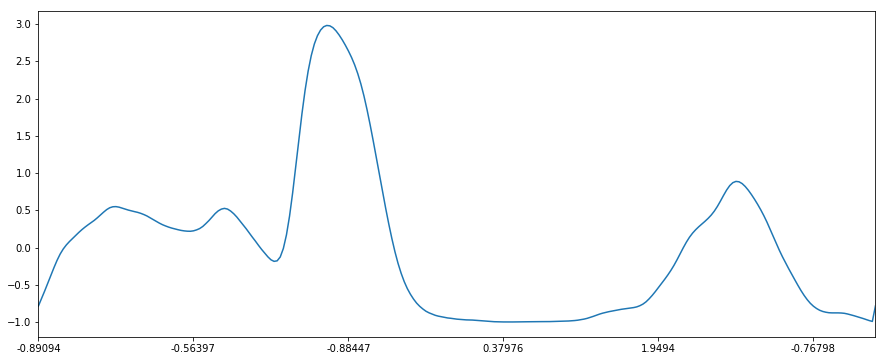

In [17]:
w.ix[0, 1:].plot()

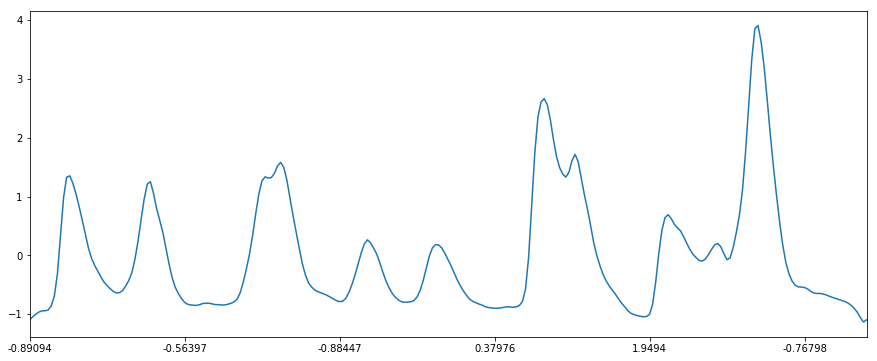

In [18]:
w.ix[2, 1:].plot()

In [19]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [22]:
# compute the distance matrix
DTWDistance(w.ix[0, 1:], w.ix[2, 1:])

10.205649751271036